# ML Project 5

Sigorta sektörü, analitik ve veri bilimi yöntemlerinin en yoğun kullanıldığı sektörlerden biridir. Bu veri seti, sigorta şirketlerinden gelen veri setleri üzerinde çalışmanın zorluklarını, kullanılan stratejileri, sonuca etki eden değişkenleri ve benzeri konuları anlamak için yeterli bir örnek sunacaktır. Bu, bir sınıflandırma problemidir. Veri seti 615 satır ve 13 sütun içermektedir.

Problem-----
Şirket, müşterilerin online başvuru formunu doldururken sağladıkları müşteri bilgilerine dayanarak kredi uygunluk sürecini (gerçek zamanlı olarak) otomatikleştirmek istiyor. Bu bilgiler Cinsiyet, Medeni Durum, Eğitim, Bağımlı Sayısı, Gelir, Kredi Miktarı, Kredi Geçmişi ve diğerlerinden oluşmaktadır. Bu süreci otomatikleştirmek için, kredi miktarına uygun müşteri segmentlerini belirlemeleri gerekmektedir, böylece bu müşterilere özel olarak hedeflenebilirler. Burada, kısmi bir veri seti sağlanmıştır.

## Importing Libraries and Data

In [1]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
#Model kütüphanelerini, modeli kurarken 
#Model değerlendirme metriklerini, modeli kurduktan sonra

In [3]:
project_5 = pd.read_csv("loan_predication.csv")

In [4]:
project_5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Analysing Data 

In [5]:
project_5.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### .info()

In [6]:
project_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### .shape

In [7]:
project_5.shape

(614, 13)

### .describe

In [8]:
project_5.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### .columns

In [9]:
project_5.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### .unique() ve .nunique()

In [10]:
project_5["Education"].nunique()

2

In [11]:
project_5["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [12]:
project_5["Property_Area"].nunique()

3

In [13]:
project_5["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

### .count()

In [14]:
project_5.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

### .isnull().sum()

In [15]:
project_5.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#Sayısal veri tipinde olan sütunlardaki boş satırları, o sütunların ortalaması ile dolduracağım: 
#'LoanAmount' Sütunu için;
LoanAmount_mean = project_5["LoanAmount"].mean()
project_5["LoanAmount"].fillna(LoanAmount_mean, inplace = True)

C:\Users\ogulc\AppData\Local\Temp\ipykernel_4772\2821687718.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  project_5["LoanAmount"].fillna(LoanAmount_mean, inplace = True)


In [17]:
#'Loan_Amount_Term' için;
Loan_Amount_Term_mean = project_5["Loan_Amount_Term"].mean()
project_5["Loan_Amount_Term"].fillna(Loan_Amount_Term_mean, inplace = True)

C:\Users\ogulc\AppData\Local\Temp\ipykernel_4772\3335137676.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  project_5["Loan_Amount_Term"].fillna(Loan_Amount_Term_mean, inplace = True)


In [18]:
#'Credit_History' için;
Credit_History_mean = project_5["Credit_History"].mean()
project_5["Credit_History"].fillna(Credit_History_mean, inplace = True)

C:\Users\ogulc\AppData\Local\Temp\ipykernel_4772\295676846.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  project_5["Credit_History"].fillna(Credit_History_mean, inplace = True)


In [19]:
project_5.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
#Object veri tipinde olan sütunlardaki null değerleri de droplayacağım
project_5.dropna(inplace = True)

In [21]:
project_5.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
project_5.shape

(554, 13)

+ **`NOT!`**

Eğer modelin performansı düşük çıkarsa, sayısal sütunlardaki null değerleri ortalama değil, medyan ile dolduracağım

### .duplicated() ve .drop_duplicated()

In [23]:
project_5.duplicated().sum()

np.int64(0)

### .value_counts()

In [24]:
project_5["Loan_Status"].value_counts()

Loan_Status
Y    382
N    172
Name: count, dtype: int64

In [25]:
project_5["Dependents"].value_counts()

Dependents
0     319
1      95
2      94
3+     46
Name: count, dtype: int64

### .corr() ve heatmap

<Axes: >

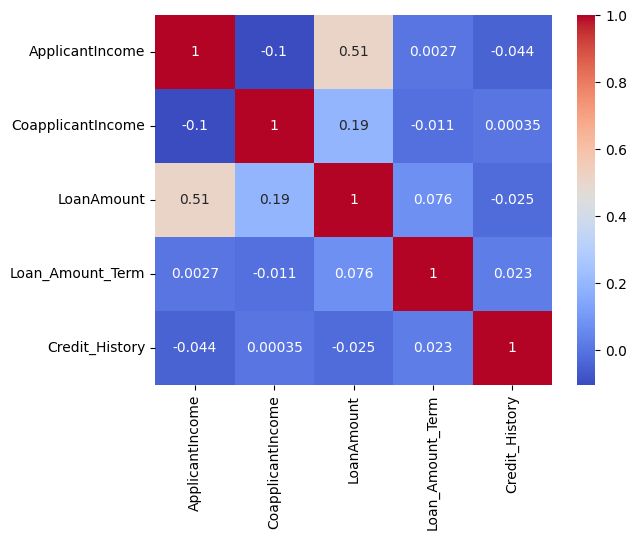

In [26]:
import seaborn as sns
cat_cols = project_5.select_dtypes(include=['object', 'category']).columns
cor = project_5.drop(columns = cat_cols).corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')

+ Yüksek korelasyonlu sayısal bir sütun olmadığı için bu sütunlardan herhangi birini çıkarmamıza gerek yok

### 'Loan_Status'.replace()

In [27]:
project_5.replace({"Loan_Status": {"N": 0, "Y": 1}}, inplace = True)

C:\Users\ogulc\AppData\Local\Temp\ipykernel_4772\4204382877.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  project_5.replace({"Loan_Status": {"N": 0, "Y": 1}}, inplace = True)


In [28]:
project_5.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0


## Data Visualization

<Axes: xlabel='Education', ylabel='count'>

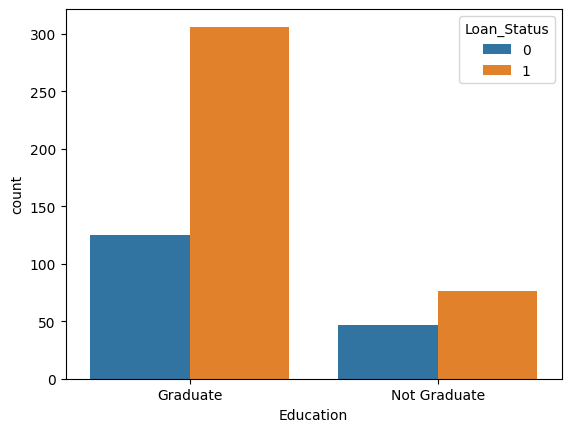

In [29]:
sns.countplot(x = "Education", hue = "Loan_Status", data = project_5)

<Axes: xlabel='Married', ylabel='count'>

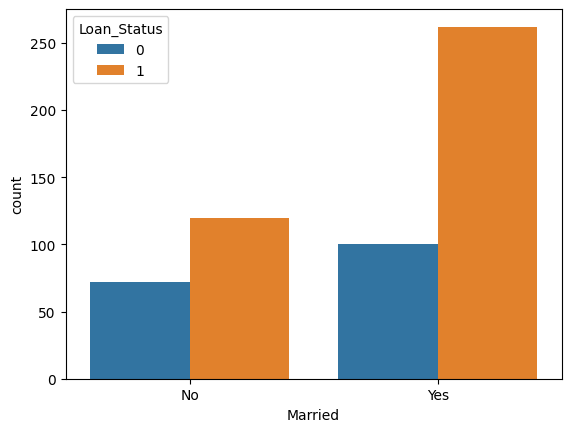

In [30]:
sns.countplot(x = "Married", hue = "Loan_Status", data = project_5)

<Axes: xlabel='Property_Area', ylabel='count'>

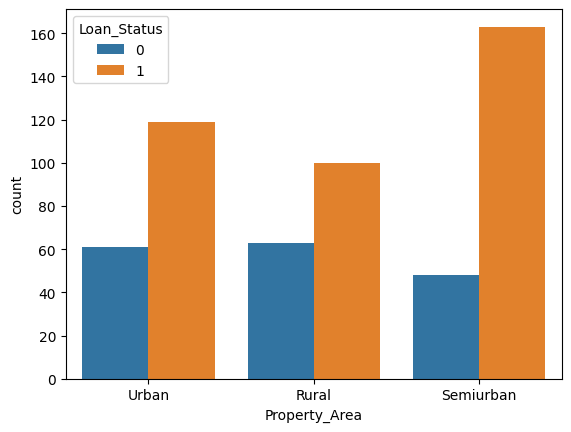

In [31]:
sns.countplot(x = "Property_Area", hue = "Loan_Status", data = project_5)

## Kategorik Sütunlar ile `Loan_Status` Sütununu Karşılaştırıp Hangi Kategorik Sütunların İlişkili Olduğunu **Ki-Kare Testi** ile Görelim

In [32]:
from scipy.stats import chi2_contingency
# Sayısal olmayan (kategorik) sütunları seçme
categorical_columns = project_5.select_dtypes(include=['object', 'category']).columns

# Kategorik sütunlar ile Loan_Status arasındaki ilişkiyi chi-square testi ile ölçme
for column in categorical_columns:
    crosstab = pd.crosstab(project_5[column], project_5['Loan_Status'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"'{column}' ile 'Loan_Status' arasındaki ilişki:")
    print(f"Chi2 Değeri: {chi2}, p-değeri: {p}\n")

'Loan_ID' ile 'Loan_Status' arasındaki ilişki:
Chi2 Değeri: 554.0, p-değeri: 0.4800229368981288

'Gender' ile 'Loan_Status' arasındaki ilişki:
Chi2 Değeri: 0.2596568696286216, p-değeri: 0.6103559879671899

'Married' ile 'Loan_Status' arasındaki ilişki:
Chi2 Değeri: 5.263607324100482, p-değeri: 0.021775839248010836

'Dependents' ile 'Loan_Status' arasındaki ilişki:
Chi2 Değeri: 4.31329381898601, p-değeri: 0.22956097625634253

'Education' ile 'Loan_Status' arasındaki ilişki:
Chi2 Değeri: 3.372833031021023, p-değeri: 0.06627968790841485

'Self_Employed' ile 'Loan_Status' arasındaki ilişki:
Chi2 Değeri: 0.05825750991420266, p-değeri: 0.809271519769845

'Property_Area' ile 'Loan_Status' arasındaki ilişki:
Chi2 Değeri: 11.867745953966258, p-değeri: 0.002648205662057561



+ `Married` sütunu ve `Property_Area` sütunlarının `Loan_Status` ile ilişkisi çıktı (P değerleri < 0.05). Bu yüzden, bu sütunlardaki değerleri **LabelEncoder** ile ve diğer sütunlardaki kategorileri de **OneHotEncoder** ile sayısal değere çevireceğiz.

### LabelEncoder

In [33]:
#Label Encoder 
label_encoder = LabelEncoder()
related_columns = ["Married", "Property_Area", "Education"]
for column in related_columns: 
    project_5[column] = label_encoder.fit_transform(project_5[column].astype(str))

In [34]:
project_5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,0,No,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,Male,1,1,0,No,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,Male,1,0,0,Yes,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,Male,1,0,1,No,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,Male,0,0,0,No,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,0,No,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,Male,1,3+,0,No,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,Male,1,1,0,No,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,Male,1,2,0,No,7583,0.0,187.000000,360.0,1.0,2,1


In [35]:
project_5["Married"].value_counts()

Married
1    362
0    192
Name: count, dtype: int64

In [36]:
project_5["Property_Area"].value_counts()

Property_Area
1    211
2    180
0    163
Name: count, dtype: int64

In [37]:
project_5["Education"].value_counts()

Education
0    431
1    123
Name: count, dtype: int64

### OneHotEncoder

In [38]:
project_5.drop("Loan_ID", axis = 1, inplace = True)

In [39]:
project_5.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,0,No,5849,0.0,146.412162,360.0,1.0,2,1
1,Male,1,1,0,No,4583,1508.0,128.000000,360.0,1.0,0,0


In [40]:
unrelated_columns = project_5[["Gender", "Dependents", "Self_Employed"]]
unrelated_columns

,Gender,Dependents,Self_Employed
0,Male,0,No
1,Male,1,No
2,Male,0,Yes
3,Male,0,No
4,Male,0,No
...,...,...,...
609,Female,0,No
610,Male,3+,No
611,Male,1,No
612,Male,2,No


In [41]:
one_hot_encoder = OneHotEncoder()
encoded_unrelated = one_hot_encoder.fit_transform(unrelated_columns).toarray()
encoded_unrelated = pd.DataFrame(encoded_unrelated)
encoded_unrelated

,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
549,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
551,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
552,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [42]:
project_5= project_5.drop(unrelated_columns, axis=1)
project_5_encoded = pd.concat([project_5.reset_index(drop=True), encoded_unrelated.reset_index(drop=True)], axis=1)

In [43]:
project_5_encoded

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0,1,2,3,4,5,6,7
0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,0,3000,0.0,66.000000,360.0,1.0,2,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,2583,2358.0,120.000000,360.0,1.0,2,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,6000,0.0,141.000000,360.0,1.0,2,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0,0,2900,0.0,71.000000,360.0,1.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,1,0,4106,0.0,40.000000,180.0,1.0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
551,1,0,8072,240.0,253.000000,360.0,1.0,2,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
552,1,0,7583,0.0,187.000000,360.0,1.0,2,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [44]:
project_5

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,0,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,0,7583,0.0,187.000000,360.0,1.0,2,1


### `project_5_encoded` sütunlarının isimlerini str veri tipine dönüştürüyoruz ki modeli eğitirken hata alınmasın 

In [45]:
project_5_encoded.columns = project_5_encoded.columns.astype(str)

## Separating `project_5_encoded` Data

In [46]:
project_5_encoded.head(3)

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0,1,2,3,4,5,6,7
0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,0,3000,0.0,66.000000,360.0,1.0,2,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [47]:
X = project_5_encoded.drop("Loan_Status", axis = 1)
y = project_5_encoded["Loan_Status"]

In [48]:
X

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0,1,2,3,4,5,6,7
0,0,0,5849,0.0,146.412162,360.0,1.0,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,0,3000,0.0,66.000000,360.0,1.0,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,2583,2358.0,120.000000,360.0,1.0,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,6000,0.0,141.000000,360.0,1.0,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0,0,2900,0.0,71.000000,360.0,1.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,1,0,4106,0.0,40.000000,180.0,1.0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
551,1,0,8072,240.0,253.000000,360.0,1.0,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
552,1,0,7583,0.0,187.000000,360.0,1.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [49]:
y

0      1
1      0
2      1
3      1
4      1
      ..
549    1
550    1
551    1
552    1
553    0
Name: Loan_Status, Length: 554, dtype: int64

## Splitting Data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)

In [51]:
print(X.shape, X_train.shape, X_test.shape)

(554, 16) (498, 16) (56, 16)


In [52]:
print(y.shape, y_train.shape, y_test.shape)

(554,) (498,) (56,)


## Fitting and Evaluating **Support Vector Machines** 

In [53]:
from sklearn.svm import SVC

In [54]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [55]:
from sklearn.model_selection import cross_val_score

### Linear SVC

In [56]:
linear_svc = SVC(kernel = "linear")
linear_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
linear_svc_pred = linear_svc.predict(X_test)
print("Linear Support Vector Machines modelinin Train setindeki skoru:", linear_svc.score(X_train, y_train))
print("Linear Support Vector Machines modelinin Accuracy (Test setindeki Doğruluk) skoru:", accuracy_score(y_test, linear_svc_pred))
print("Linear Support Vector Machines modelinin Precision (Hassasiyet) skoru:", precision_score(y_test, linear_svc_pred))
print("Linear Support Vector Machines modelinin Recall (Duyarlılık) skoru:", recall_score(y_test, linear_svc_pred))
print("Linear Support Vector Machines modelinin F1 skoru:", f1_score(y_test, linear_svc_pred))
print("Linear Support Vector Machines modelinin ROC-AUC skoru:", roc_auc_score(y_test, linear_svc_pred))

Linear Support Vector Machines modelinin Train setindeki skoru: 0.7991967871485943
Linear Support Vector Machines modelinin Accuracy (Test setindeki Doğruluk) skoru: 0.7857142857142857
Linear Support Vector Machines modelinin Precision (Hassasiyet) skoru: 0.8636363636363636
Linear Support Vector Machines modelinin Recall (Duyarlılık) skoru: 0.8636363636363636
Linear Support Vector Machines modelinin F1 skoru: 0.8636363636363636
Linear Support Vector Machines modelinin ROC-AUC skoru: 0.6818181818181819


In [58]:
cv_scores = cross_val_score(linear_svc, X, y)
print("Her modeldeki doğruluk oranı:", cv_scores)
print("\nModellerin doğruluk oranlarının ortalaması:", cv_scores.mean())

### Polynomial SVC 

In [ ]:
poly_svc = SVC(kernel = "poly")
poly_svc.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
poly_svc_pred = poly_svc.predict(X_test)
print("Polynomial Support Vector Machines modelinin Train setindeki skoru:", poly_svc.score(X_train, y_train))
print("Polynomial Support Vector Machines modelinin Accuracy (Test setindeki Doğruluk) skoru:", accuracy_score(y_test, poly_svc_pred))
print("Polynomial Support Vector Machines modelinin Precision (Hassasiyet) skoru:", precision_score(y_test, poly_svc_pred))
print("Polynomial Support Vector Machines modelinin Recall (Duyarlılık) skoru:", recall_score(y_test, poly_svc_pred))
print("Polynomial Support Vector Machines modelinin F1 skoru:", f1_score(y_test, poly_svc_pred))
print("Polynomial Support Vector Machines modelinin ROC-AUC skoru:", roc_auc_score(y_test, poly_svc_pred))

Polynomial Support Vector Machines modelinin Train setindeki skoru: 0.6847389558232931
Polynomial Support Vector Machines modelinin Accuracy (Test setindeki Doğruluk) skoru: 0.7678571428571429
Polynomial Support Vector Machines modelinin Precision (Hassasiyet) skoru: 0.7818181818181819
Polynomial Support Vector Machines modelinin Recall (Duyarlılık) skoru: 0.9772727272727273
Polynomial Support Vector Machines modelinin F1 skoru: 0.8686868686868687
Polynomial Support Vector Machines modelinin ROC-AUC skoru: 0.48863636363636365


In [ ]:
cv_scores = cross_val_score(poly_svc, X, y)
print("Her modeldeki doğruluk oranı:", cv_scores)
print("\nModellerin doğruluk oranlarının ortalaması:", cv_scores.mean())

Her modeldeki doğruluk oranı: [0.69369369 0.69369369 0.68468468 0.68468468 0.69090909]

Modellerin doğruluk oranlarının ortalaması: 0.6895331695331696


### RBF SVC

In [ ]:
rbf_svc = SVC(kernel = "rbf")
rbf_svc.fit(X_train, y_train)

SVC()

In [ ]:
rbf_svc_pred = rbf_svc.predict(X_test)
print("RBF Support Vector Machines modelinin Train setindeki skoru:", rbf_svc.score(X_train, y_train))
print("RBF Support Vector Machines modelinin Accuracy (Test setindeki Doğruluk) skoru:", accuracy_score(y_test, rbf_svc_pred))
print("RBF Support Vector Machines modelinin Precision (Hassasiyet) skoru:", precision_score(y_test, rbf_svc_pred))
print("RBF Support Vector Machines modelinin Recall (Duyarlılık) skoru:", recall_score(y_test, rbf_svc_pred))
print("RBF Support Vector Machines modelinin F1 skoru:", f1_score(y_test, rbf_svc_pred))
print("RBF Support Vector Machines modelinin ROC-AUC skoru:", roc_auc_score(y_test, rbf_svc_pred))

RBF Support Vector Machines modelinin Train setindeki skoru: 0.6867469879518072
RBF Support Vector Machines modelinin Accuracy (Test setindeki Doğruluk) skoru: 0.7678571428571429
RBF Support Vector Machines modelinin Precision (Hassasiyet) skoru: 0.7818181818181819
RBF Support Vector Machines modelinin Recall (Duyarlılık) skoru: 0.9772727272727273
RBF Support Vector Machines modelinin F1 skoru: 0.8686868686868687
RBF Support Vector Machines modelinin ROC-AUC skoru: 0.48863636363636365


In [ ]:
cv_scores = cross_val_score(rbf_svc, X, y)
print("Her modeldeki doğruluk oranı:", cv_scores)
print("\nModellerin doğruluk oranlarının ortalaması:", cv_scores.mean())

Her modeldeki doğruluk oranı: [0.69369369 0.69369369 0.68468468 0.68468468 0.68181818]

Modellerin doğruluk oranlarının ortalaması: 0.6877149877149877
